# IBM API - Anomaly Detection in Time Series (univariate data)

Anomaly Detection APIs are featured in an early access offering from IBM Research, encompassing state-of-the-art techniques for anomaly detection in time series data.

Utilizing sample univariate data, I employed the **IBM API to detect anomalies**. The analysis involved exploring 75 pipeline combinations, with a lookback window size of 33. 

The chosen model for this analysis was **LinearSVR** - Support Vector Regression with a linear kernel.

Following the analysis, the results were **visualized**, providing a clear representation of the detected anomalies. 

Additionally, I conducted **K-Means clustering** to identify potential trends within the clusters, further enhancing the understanding of the data patterns.

Moreover, seasonality was detected through **Fourier Analysis and Decomposition using the statsmodels** library, adding another layer of insight into the underlying temporal patterns present in the data.

# Data

In [111]:
import pandas as pd

data_df = pd.read_csv("univariate_time_series_data.csv")
data_df.head()

,Time,Value
0,2017-01-01 00:00:00,3.000000
1,2017-01-01 00:05:00,1.572558
2,2017-01-01 00:10:00,1.873181
3,2017-01-01 00:15:00,1.361140
4,2017-01-01 00:20:00,1.408475


array([<Axes: xlabel='Time'>], dtype=object)

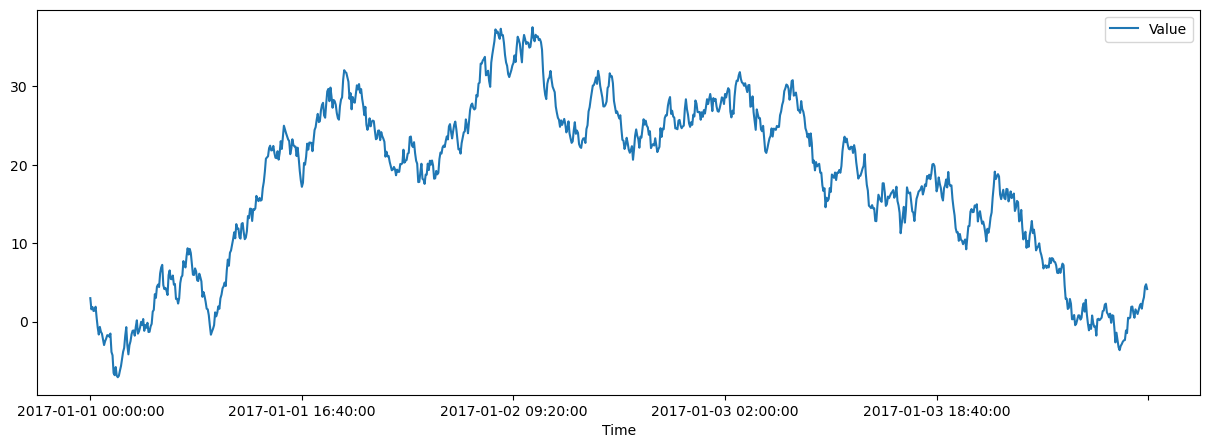

In [112]:
timestamp = "Time"
value = "Value"
time_format = '%Y-%m-%d %H:%M:%S'
data_df.plot(x=timestamp, y=value, subplots=True, figsize=(15, 5))

# Predict anomalies using IBM API

The detail of these parameters are available at IBM API Hub @ IBM for Univariate Anomaly detection service.

In [136]:
import requests
import json

# prepare the data file
datafile_name = 'univariate_time_series_data.csv'  # replace with your data file name
file_path = 'univariate_time_series_data.csv'    # replace with your file path
files = {'data_file': (datafile_name, open(file_path, 'rb'))}

# prepare the headers
headers = {
    'X-IBM-Client-Id': "62ea75b7ba73ccfb6fb0060628928346", # "replace-with-valid-client-ID",  # replace with your cliend id      
    'X-IBM-Client-Secret': "dfd2ecd29006ad322ac7a0cc4dbd1cfd", # "replace-with-valid-client-Secret",  # replace with your client secret
    'accept': "application/json",
    }

# prepare the parameter settings
data = {
     'target_column': 'Value',
     'time_column': 'Time',
     'time_format': 'None',
     'prediction_type': 'entire',  #  the prediction will be made for the entire time series data
     'algorithm_type': 'DeepAD',  # a deep learning-based anomaly detection algorithm
     'lookback_window': 'auto',  # the size of the window used to look back in time when making predictions. The value 'auto' suggests that the algorithm will automatically determine the optimal size for the lookback window.
     'observation_window': 10, # the size of the observation window, which is the period of time over which anomalies will be detected. Here, a value of 10 is used, indicating an observation window of size 10 time units.
     'labeling_method': '<IID',  # Independent and Identically Distributed, which means that anomalies are labeled based on their deviation from the normal distribution of the data.
     'labeling_threshold': 10,  # the threshold for labeling anomalies. Anomalies with scores above this threshold will be labeled as anomalies
     'anomaly_estimator': 'Default',  # 
}

post_response = requests.post("https://api.ibm.com/ai4industry/run/anomaly-detection/timeseries/univariate/batch",
                           data=data,
                           files=files,
                           headers=headers)

print(post_response.json())

{'filename': 'univariate_time_series_data.csv', 'jobId': 'ca6d341c-2db0-4776-91d6-f9c668146309', 'status': 'The job is submitted. Please record the jobId and use it in the GET /result/<jobId> request to get the result.'}


In [137]:
get_response = requests.get("https://api.ibm.com/ai4industry/run/result/" + '05db0f61-4813-4ec7-9d49-054284b1b01c', headers=headers)
json_data = get_response.json()

print("the status of job {} is {}.".format('05db0f61-4813-4ec7-9d49-054284b1b01c', json_data['status']))

the status of job 05db0f61-4813-4ec7-9d49-054284b1b01c is executing.


## Retrieve the result of a submitted job

In [139]:
headers = {
     'X-IBM-Client-Id': "62ea75b7ba73ccfb6fb0060628928346", # "replace-with-valid-client-ID",  # replace with your client id      
     'X-IBM-Client-Secret': "dfd2ecd29006ad322ac7a0cc4dbd1cfd", # "replace-with-valid-client-Secret",  # replace with your client secret
     'accept': "application/json",
     }
jobId = 'd10c5eb0-b9f6-4846-85a8-524165d620bc' # 'replace-with-your-job-id'  # replace with your jobId

get_response = requests.get("https://api.ibm.com/ai4industry/run/result/" + jobId, headers=headers)

#print(get_response.json())

pretty_json = json.dumps(get_response.json(), indent=4)
print(pretty_json)

{
    "filename": "univariate_time_series_data.csv",
    "jobId": "d10c5eb0-b9f6-4846-85a8-524165d620bc",
    "prediction_type": "entire",
    "status": "done",
    "summary": {
        "lookback_window": "33",
        "model_summary": "[('SkipTransformer',NoOp()),('NormalizedFlatten',NormalizedFlatten(feature_columns=[1],lookback_win=33,target_columns=[1])),('LinearSVR',LinearSVR(random_state=0)),]",
        "num_pipelines_explored": 75,
        "num_pipelines_finished": 75,
        "result": [
            {
                "timestamp": "2017-01-01 00:00:00",
                "value": {
                    "anomaly_score": [
                        NaN
                    ]
                }
            },
            {
                "timestamp": "2017-01-01 00:05:00",
                "value": {
                    "anomaly_score": [
                        NaN
                    ]
                }
            },
            {
                "timestamp": "2017-01-01 00:10:00",
   

# Interpretation

- Time Series data used: univariate_time_series_data.csv
- The size of the lookback window used in the analysis 33.
- The number of pipeline combinations explored during the analysis 75 (all finished).

- Technical summary:
  
SkipTransformer: This indicates that a SkipTransformer operation was applied to the data. 
SkipTransformer typically doesn't perform any transformation on the data and serves as a placeholder or identity operation.

NormalizedFlatten: This operation flattes the data and normalizes it. 
Specifically, it flattes the data along the specified feature columns (in this case, column index 1),
with a lookback window of 33 time steps. This operation prepares the data for further processing or modeling.

LinearSVR: a Support Vector Regression (SVR) model with a linear kernel was used for the anomaly detection task. 
SVR is a type of Support Vector Machine (SVM) algorithm used for regression tasks. 
                                                            
random_state=0: This parameter specifies the random seed used for initializing the random number generator in the LinearSVR model. 
Setting the random state ensures reproducibility of the results.

- Result: Contains anomaly scores for each timestamp in the time series data.
Anomaly scores are represented as an array of scores for each timestamp.
A NaN value indicates that no anomaly was detected, while numeric values represent the anomaly scores.

- Total Execution Time: The total time taken for the execution of the anomaly detection job in seconds (54.3393452167511).

No predefined threshold is known.


Save results:

In [46]:
import pandas as pd

results = get_response.json()

data = pd.read_csv(datafile_name)
anomaly_scores = [entry['value']['anomaly_score'][0] for entry in results['summary']['result']]

data['anomaly_score'] = anomaly_scores

# Save
data.to_csv("predicted_anomalies_univariate_time_series_data.csv", index=False)
print("Predictions saved")

Predictions saved


# Visualization

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

results = get_response.json()

# Extracting timestamps and anomaly scores
timestamps = [entry['timestamp'] for entry in results['summary']['result']]
anomaly_scores = [entry['value']['anomaly_score'][0] for entry in results['summary']['result']]

# Creating a DataFrame
df = pd.DataFrame({'Timestamp': timestamps, 'Anomaly Score': anomaly_scores})

# Replace NaN with zero
df['Anomaly Score'] = df['Anomaly Score'].fillna(0)

### Plot values and anomaly scores in parallel.

array([<Axes: >, <Axes: >], dtype=object)

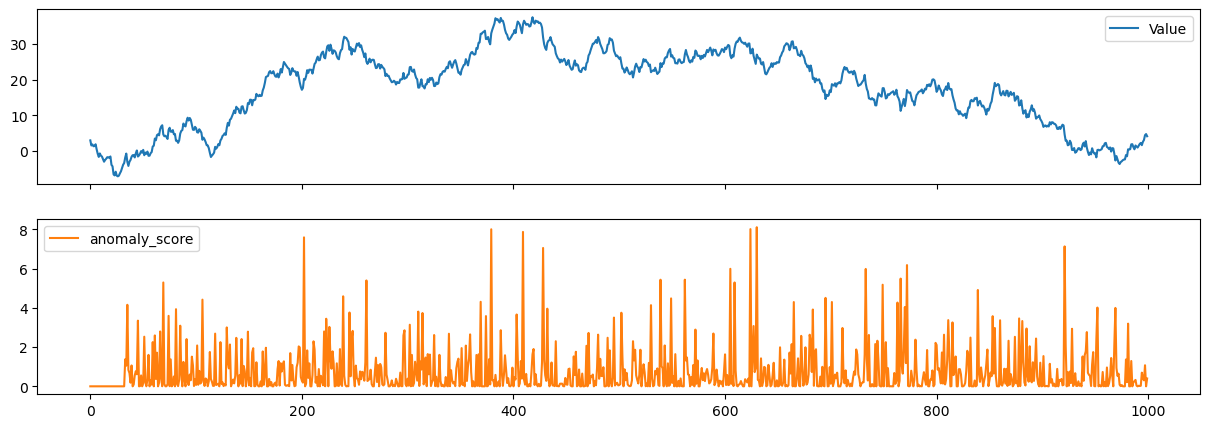

In [115]:
data[['Value','anomaly_score']].plot(subplots=True, figsize=(15, 5))

## Time Series Plot of Anomaly Scores (no threshold)

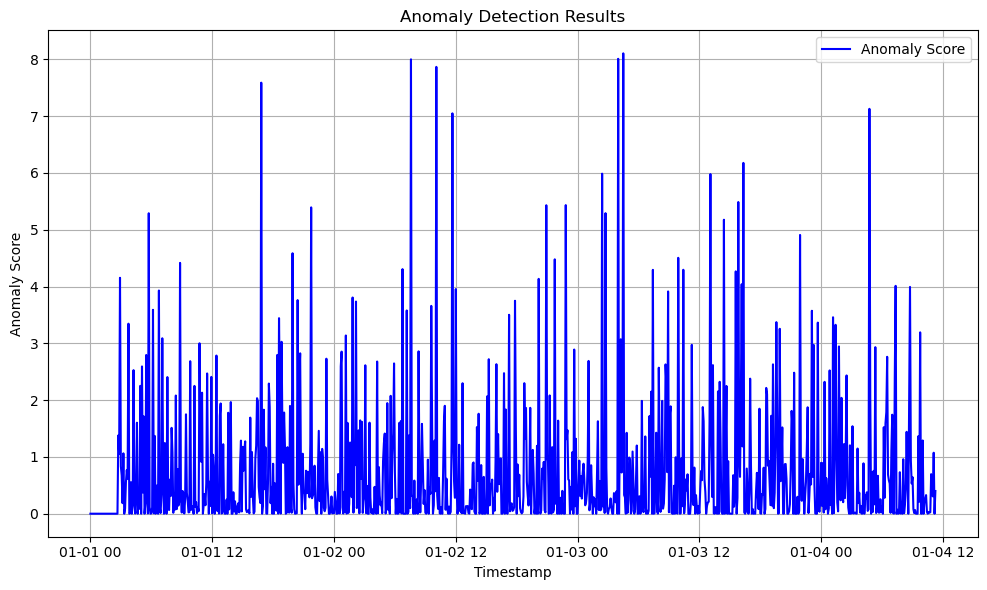

In [58]:
# Converting Timestamp column to datetime type
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plotting the time series data and anomalies
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Anomaly Score'], color='blue', label='Anomaly Score')
plt.xlabel('Timestamp')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Detection Results')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Time Series Plot with Anomalies Highlighted (artificial threshold = 6)

Plot the time series data along with the anomaly scores, highlighting points that exceed a certain threshold (here we use an artificial threshold = 6).

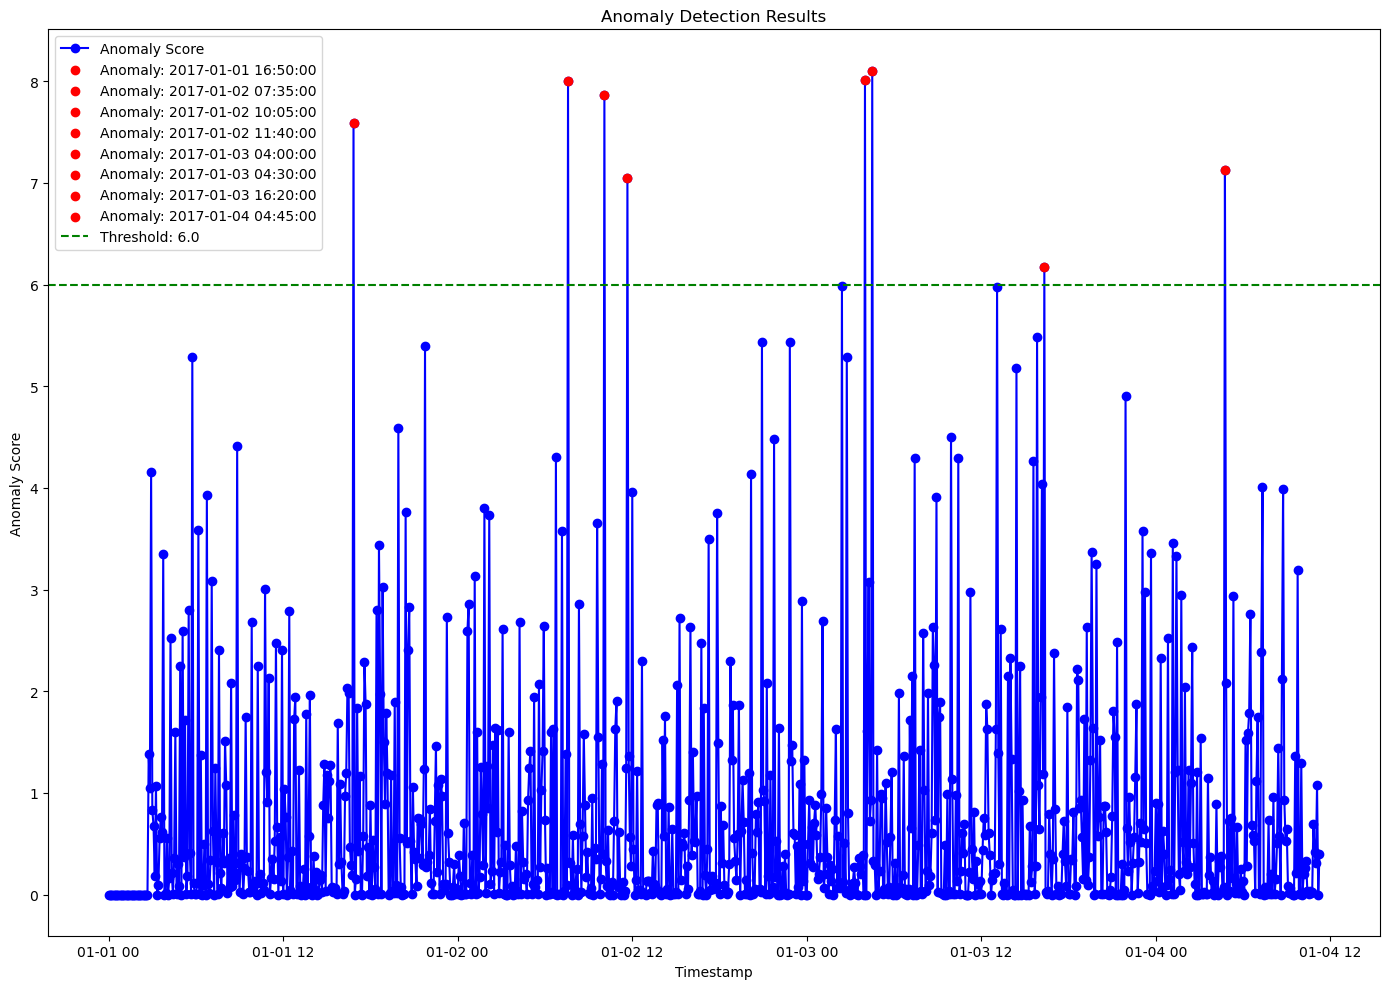

In [61]:

# Plot time series data
plt.figure(figsize=(14, 10))
plt.plot(df['Timestamp'], df['Anomaly Score'], color='blue', marker='o', linestyle='-', label='Anomaly Score')
plt.xlabel('Timestamp')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Detection Results')
# plt.grid(True)

# Highlight anomalies (e.g., scores above a certain threshold)
threshold = 6.0  # Example threshold (adjust as needed)
for i, score in enumerate(df['Anomaly Score']):
    if score > threshold:
        plt.scatter(df['Timestamp'][i], score, color='red', label=f'Anomaly: {df["Timestamp"][i]}', zorder=5)

# Plot threshold line
plt.axhline(y=threshold, color='green', linestyle='--', label=f'Threshold: {threshold}')

plt.legend()
plt.tight_layout()
plt.show()


## Histogram of Anomaly Scores

Visualize the distribution of anomaly scores using a histogram to understand their spread and identify potential thresholds.

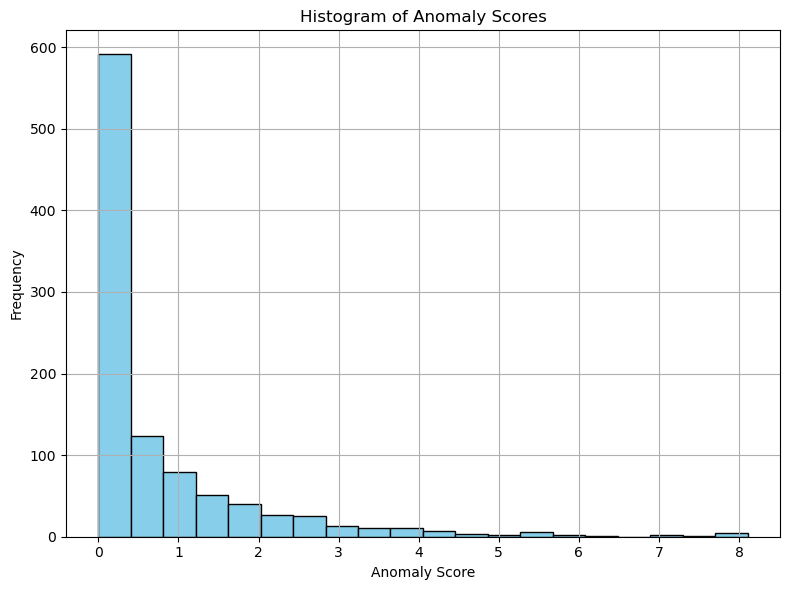

In [62]:
# Plot histogram of anomaly scores
plt.figure(figsize=(8, 6))
plt.hist(df['Anomaly Score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Histogram of Anomaly Scores')
plt.grid(True)
plt.tight_layout()
plt.show()


## Box Plot of Anomaly Scores

Visualize the distribution of anomaly scores using a box plot to identify outliers and variability.

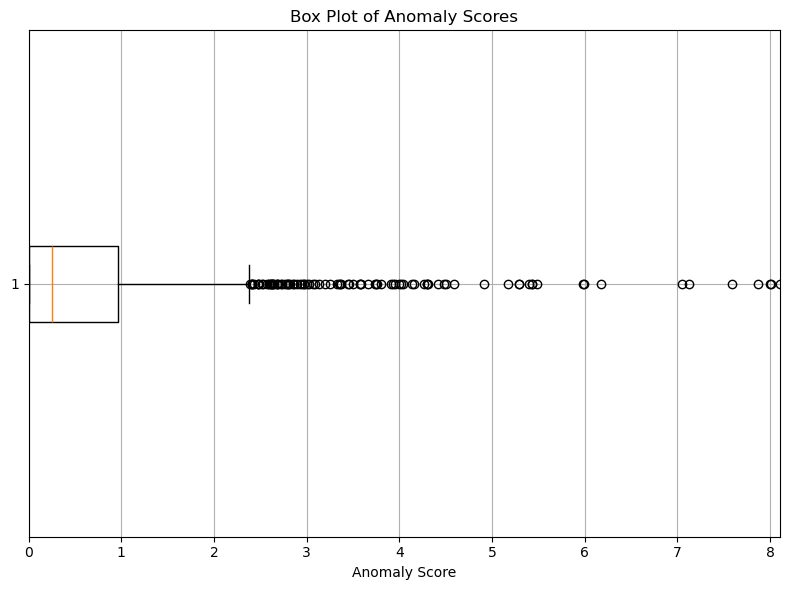

In [64]:
import numpy as np

# Replace NaN with zero
df['Anomaly Score'] = df['Anomaly Score'].fillna(0)

plt.figure(figsize=(8, 6))
plt.boxplot(df['Anomaly Score'], vert=False, showfliers=True)  #  showfliers=True to show outliers
plt.xlabel('Anomaly Score')
plt.title('Box Plot of Anomaly Scores')
plt.grid(True)
plt.xlim(left=min(df['Anomaly Score']), right=max(df['Anomaly Score']))  # limits of x axis
plt.tight_layout()
plt.show()


## Other

As we have only timestamps, values and anomaly scores - and no other features - creating a Heatmap doesn't make sense.

# K-Means clustering to analyze anomaly scores

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data
# csv with timestamp, value and predicted anomaly_score
data = pd.read_csv("predicted_anomalies_univariate_time_series_data.csv")
data.head()

,Time,Value,anomaly_score
0,2017-01-01 00:00:00,3.000000,NaN
1,2017-01-01 00:05:00,1.572558,NaN
2,2017-01-01 00:10:00,1.873181,NaN
3,2017-01-01 00:15:00,1.361140,NaN
4,2017-01-01 00:20:00,1.408475,NaN


/Users/tetyanachernenko/Programming/anaconda3/envs/Experiments/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


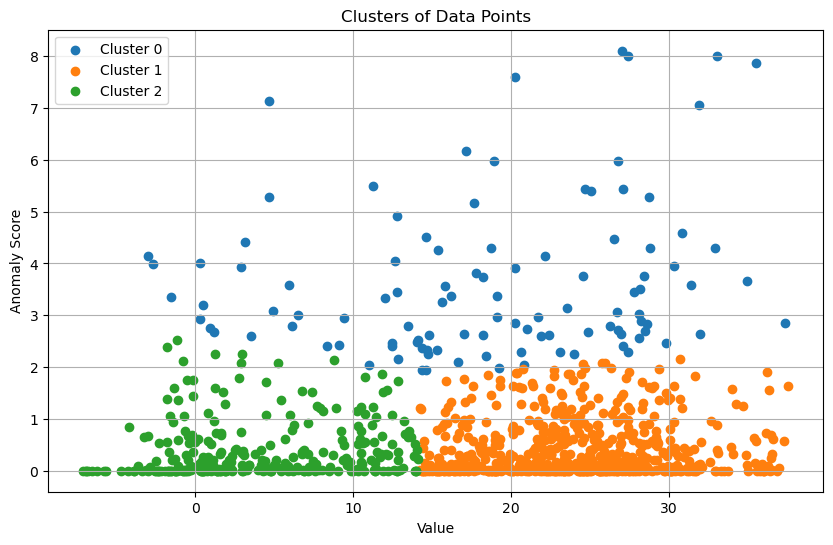

In [65]:
# Features
X = data[['Value', 'anomaly_score']]

# Normalize
scaler = StandardScaler()  # standard scaling
X_scaled = scaler.fit_transform(X)

# Number of clusters
n_clusters = 3

# Use KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Add cluster labels to the DataFrame
data['cluster'] = labels

plt.figure(figsize=(10, 6))

for cluster in range(n_clusters):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['Value'], cluster_data['anomaly_score'], label=f'Cluster {cluster}')

plt.xlabel('Value')
plt.ylabel('Anomaly Score')
plt.title('Clusters of Data Points')
plt.legend()
plt.grid(True)
plt.show()



### Cluster 1 (green): Smaller values with smaller anomaly scores
This cluster comprises data points with smaller values, generally less than 15.
The anomaly scores associated with this cluster are also relatively small, typically less than 2.5.
These data points represent a group with lower values and lower likelihood of being classified as anomalies.

### Cluster 2 (orange): Higher values with smaller anomaly scores
In this cluster, data points have higher values, greater than 15.
Despite the higher values, the anomaly scores remain relatively small, usually less than 2.2.
This cluster represents a group with higher values but still low anomaly scores, suggesting a lower likelihood of anomalies compared to 

### Cluster 3 (blue): Different values with higher anomaly scores
This cluster is distinct from the others, comprising data points with varying values.
However, what sets this cluster apart is the higher anomaly scores associated with its data points, typically greater than 2.2.
This cluster is smaller than the other two, it includes anomalies, indicating that these data points have a higher likelihood of being classified as anomalies.
#### !!! Notably, for higher values within this cluster, the anomaly scores are slightly elevated, suggesting a slightly higher anomaly risk associated with these values.


## K-Means CLustering incl. timestamps (without seasonality _yet_)

/Users/tetyanachernenko/Programming/anaconda3/envs/Experiments/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


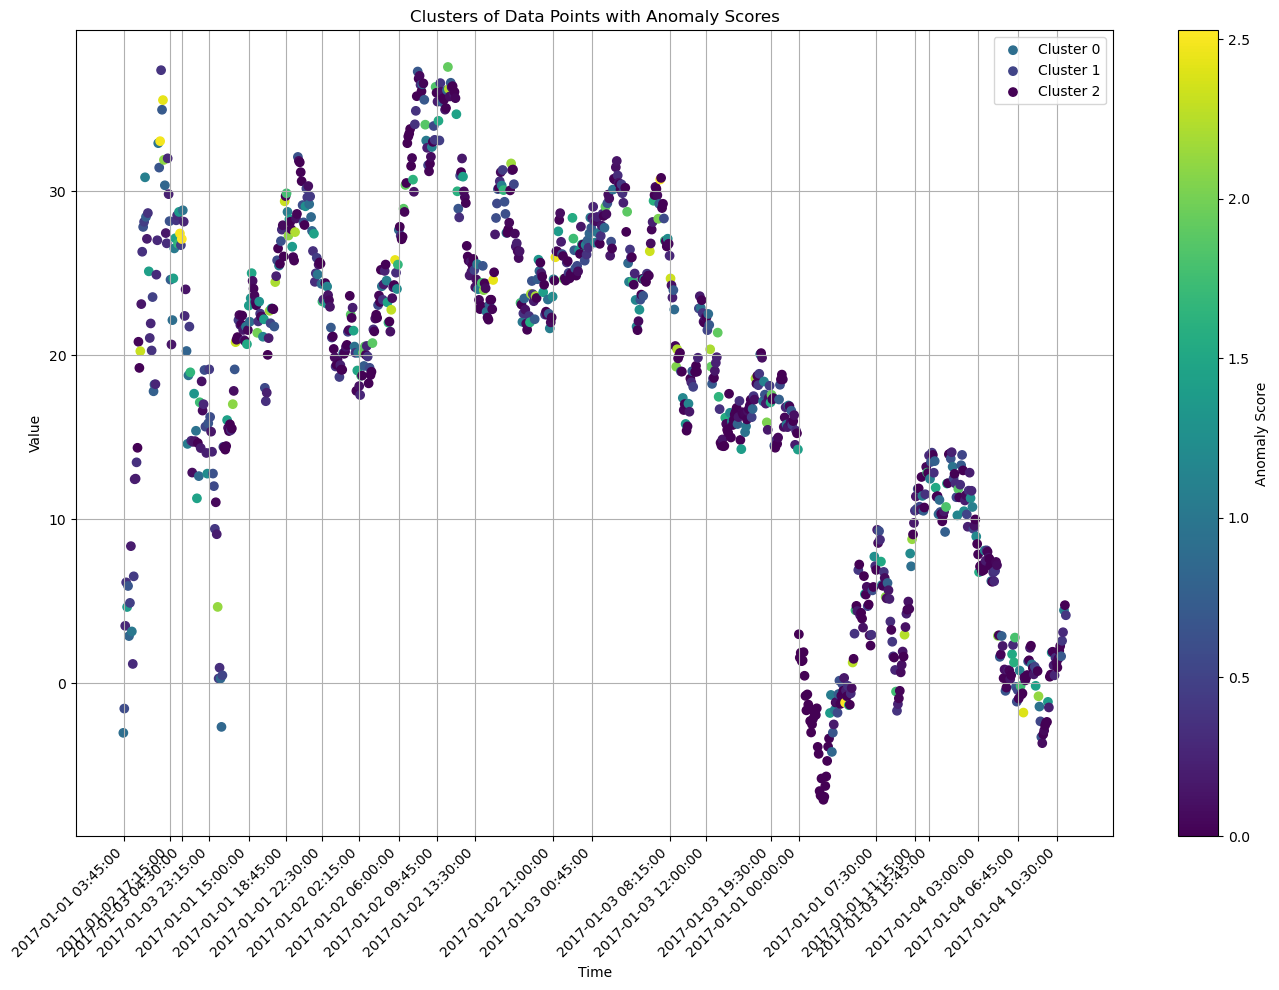

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv("predicted_anomalies_univariate_time_series_data.csv")

# Replace missing values with 0
data.fillna(0, inplace=True)

# Select features for clustering (including timestamps)
X = data[['Time', 'Value', 'anomaly_score']]

# Normalize features
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X.iloc[:, 1:])  

# Number of clusters
n_clusters = 3

# Clustering using KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Add cluster labels to the DataFrame
data['cluster'] = labels

# Visualization of clustering results
plt.figure(figsize=(14, 10))

for cluster in range(n_clusters):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['Time'], cluster_data['Value'], c=cluster_data['anomaly_score'], cmap='viridis', label=f'Cluster {cluster}')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Clusters of Data Points with Anomaly Scores')
plt.colorbar(label='Anomaly Score')
plt.legend()
plt.grid(True)

# Thin out timestamps on the x-axis
timestamps = data['Time'].tolist()
timestamps = timestamps[::45]  # Thin out every 10th timestamp

plt.xticks(rotation=45, ha='right', ticks=timestamps)  # Set thinned out timestamps on the x-axis

plt.tight_layout()
plt.show()


In [105]:
print("Minimum Timestamp:", data['Time'].min())
print("Maximum Timestamp:", data['Time'].max())

Minimum Timestamp: 2017-01-01 00:00:00
Maximum Timestamp: 2017-01-04 11:15:00


In [106]:
# Set display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Sort the DataFrame by 'Time'
sorted_data = data.sort_values(by='Time')

# Display the sorted DataFrame
print(sorted_data)


                    Time      Value  anomaly_score  cluster
0    2017-01-01 00:00:00   3.000000   0.000000e+00        2
1    2017-01-01 00:05:00   1.572558   0.000000e+00        2
2    2017-01-01 00:10:00   1.873181   0.000000e+00        2
3    2017-01-01 00:15:00   1.361140   0.000000e+00        2
4    2017-01-01 00:20:00   1.408475   0.000000e+00        2
5    2017-01-01 00:25:00   1.908858   0.000000e+00        2
6    2017-01-01 00:30:00   0.471416   0.000000e+00        2
7    2017-01-01 00:35:00  -0.755087   0.000000e+00        2
8    2017-01-01 00:40:00  -1.636673   0.000000e+00        2
9    2017-01-01 00:45:00  -0.663525   0.000000e+00        2
10   2017-01-01 00:50:00  -1.283220   0.000000e+00        2
11   2017-01-01 00:55:00  -1.536990   0.000000e+00        2
12   2017-01-01 01:00:00  -2.287679   0.000000e+00        2
13   2017-01-01 01:05:00  -2.983284   0.000000e+00        2
14   2017-01-01 01:10:00  -2.489979   0.000000e+00        2
15   2017-01-01 01:15:00  -2.149973   0.

### - Clear trend of lower values starting approximately from 2017-01-04: 
This suggests that there might have been a significant event or change that occurred 
around this time period, leading to a decrease in the observed values. Without additional 
context or information about the data, it's challenging to determine the exact cause of this trend. 
Possible reasons could include changes in market conditions, shifts in consumer behavior, 
or external factors affecting the underlying process being measured.

### - No linear connection between the data (date only, without time of the day yet) and anomaly score: This observation indicates that 
there isn't a straightforward linear relationship between the observed values and the anomaly scores. 
In other words, changes in the data values do not necessarily correspond to changes in the anomaly 
scores in a predictable manner. This could suggest that anomalies are detected based on patterns 
or deviations that are not solely determined by the magnitude of the date values.

### - Clear seasonality: The presence of clear seasonality in the data suggests that there are recurring 
patterns or cycles that occur over specific time intervals. Seasonality can often be observed in 
time series data, particularly in economic indicators, weather patterns, or other phenomena that exhibit 
periodic variations. Further analysis of the seasonality could involve identifying the periodicity of 
the patterns (e.g., daily, weekly, monthly) and exploring potential factors driving these patterns.


# Seasonality

To further analyze the seasonality and potential patterns in the data, we can consider using time **series decomposition techniques such as seasonal decomposition or Fourier analysis**. 

These methods can help to separate the data into trend, seasonal, and residual components, allowing to better understand the underlying patterns and relationships.

Additionally, if we see clear seasonality in the data, we may want to explore methods such as seasonal autoregressive integrated moving average (**SARIMA**) models or seasonal naive forecasting to model and forecast future values while accounting for the observed seasonal patterns.

## Decomposition (statsmodels)

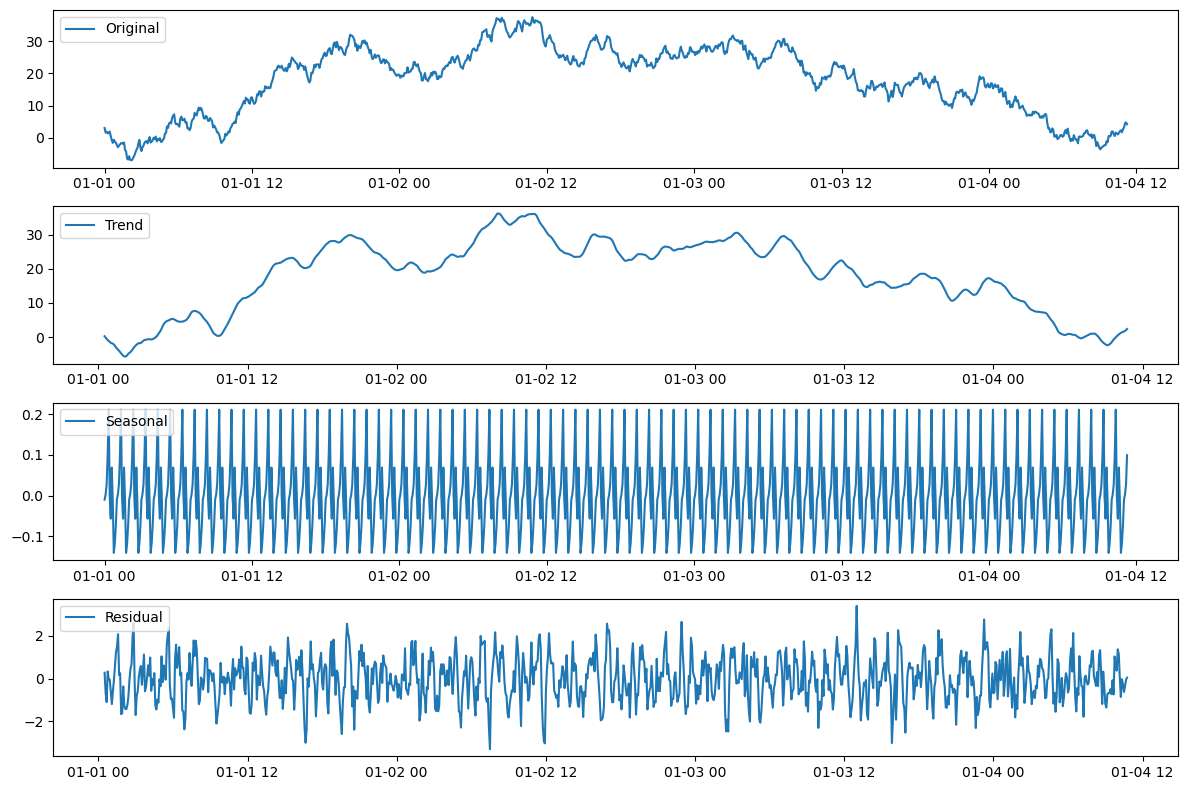

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load data
data = pd.read_csv("predicted_anomalies_univariate_time_series_data.csv")

# Convert 'Time' column to datetime type
data['Time'] = pd.to_datetime(data['Time'])

# Set 'Time' column as index
data.set_index('Time', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(data['Value'], model='additive', period=12)  # Assuming seasonal period is 12 (monthly data)

# Plot the original time series
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Value'], label='Original')
plt.legend(loc='upper left')

# Plot the trend component
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

# Plot the seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

# Plot the residual component
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


Let's analyze each component:

### Original Time Series:
This plot shows the raw data without any transformations.
Using this plot, we can assess the overall nature of the time series, its trends, and seasonal fluctuations.

### Trend Component:
This plot displays the general trend or direction of change in the data.
Utilizing this component, we can identify long-term trends, including growth, decline, or stability in the time series.
In our case, the trend initially starts at a lower level, then rises to a peak around the middle, and declines towards the end.

### Seasonal Component:
This plot illustrates the seasonal fluctuations in the data.
The seasonal component helps to identify cyclic patterns or recurring fluctuations in the data that occur at the same time each season or period.
There are clear oscillations repeating 12 times within a day, indicating a periodicity likely related to the measurement intervals.
These fluctuations suggest that certain patterns repeat consistently over the course of each day, possibly corresponding to daily cycles, such as daytime and nighttime variations, hourly changes, or other regular patterns. Difficult to interpret without additional context.

### Residual Component:
This plot shows the residual or random fluctuations that remain after removing the trend and seasonal components.
Using this component, you can assess the level of noise or unpredictability in the data.
We detect noise: the residual component exhibits fluctuations ranging from approximately -2 to +2 or stronger multiple times throughout the day.


# Fourier Spectrum

 Fourier analysis is a powerful tool used to decompose time series data into its underlying frequency components. This can help identify periodic patterns in the data.

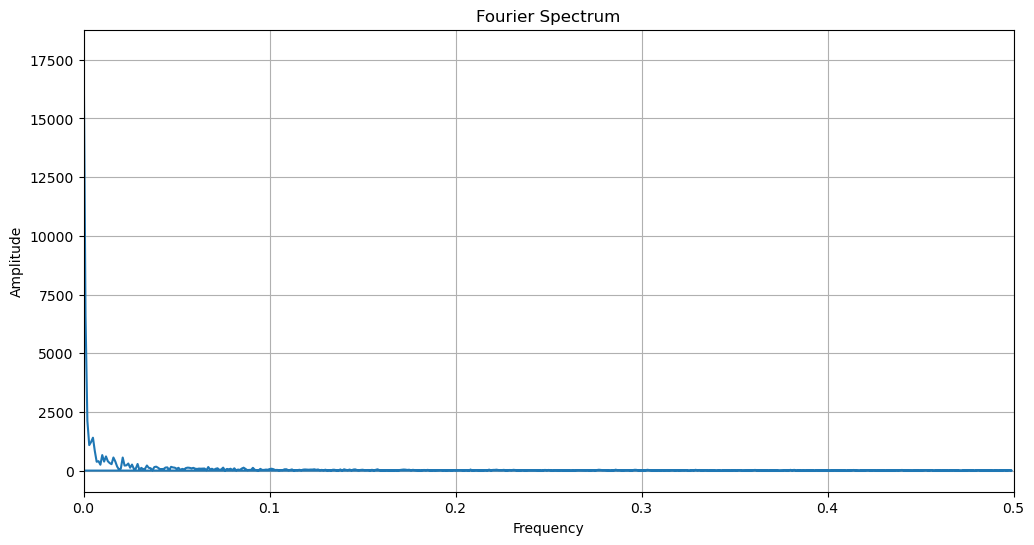

In [145]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("predicted_anomalies_univariate_time_series_data.csv")

# Convert 'Time' column to datetime type
data['Time'] = pd.to_datetime(data['Time'])

# Set 'Time' column as index
data.set_index('Time', inplace=True)

# Perform Fourier analysis
values = data['Value'].values
n = len(values)
frequencies = np.fft.fftfreq(n)
amplitudes = np.abs(fft(values))

# Plot Fourier spectrum
plt.figure(figsize=(12, 6))
plt.plot(frequencies, amplitudes)
plt.title('Fourier Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.xlim(0, 0.5)  # Show frequencies up to Nyquist frequency (0.5)
plt.grid(True)
plt.show()


The amplitude of peaks decreases with increasing frequency on the Fourier plot, this may indicate the presence of high-frequency noise or irregular oscillations that do not have a significant impact on the data.